### LSTM System Identification

Name: Ananda Cahyo Wibowo<br />
NRP : 07111940000128 <br />
Undergrad Thesis Title : Data Driven Gas Lift Well And Network Optimization With Neural Network Based System Identification Using Modbus Simulator

Data Preparation

In [1]:
import pandas as pd

df1 = pd.read_csv("upsampled_corr_well.csv")
df2 = pd.read_csv("upsampled_corr_well22.csv")

#print(df1.describe())
#print(df2.describe())

import pandas as pd

#df1 = pd.read_excel("oa-11.xlsx")
#df2 = pd.read_excel("oa-12.xlsx")

print(df1.describe())
print(df2.describe())

             index         glir           qo           qt           wc  \
count  4967.000000  4967.000000  4967.000000  4967.000000  4967.000000   
mean   2484.000000   187.294916   209.693213   409.981462    10.021975   
std    1433.993724   143.047992    61.454992    66.874207    10.677645   
min       1.000000    54.200000   134.000000   328.000000     3.990000   
25%    1242.500000    56.000000   145.000000   339.950000     3.990000   
50%    2484.000000   146.000000   208.000000   407.030000     5.300000   
75%    3725.500000   281.200000   247.000000   455.520000    11.990000   
max    4967.000000   676.200000   382.370000   604.810000    63.990000   

                ch           gor  
count  4967.000000   4967.000000  
mean   1327.354184  14275.192547  
std     287.919429   3919.117356  
min     465.860000   7615.670000  
25%    1133.000000  11151.920000  
50%    1370.000000  13463.020000  
75%    1548.000000  18480.160000  
max    1767.000000  21955.220000  
             index

In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import load_model
import seaborn as sns
#from datetime import datetime

#Read the csv file
df = pd.read_csv("upsampled_revv.csv")
df = pd.read_csv("upsampled_corr.csv")
#df = pd.read_csv("upsampled.csv")
df2=df.drop(df.columns[0], axis=1)
data = df['glir11'].to_numpy()

split = 0.6
epoch = 20
batchsize = 300
filename = "RNN_qo_type4_" + f"{epoch}+{batchsize}" 

"""x = df[['glir11','wc11','ch11','gor11']]
y = df[['qo11']]

x1 = df[['glir11','wc11','ch11','gor11']][:int(split*len(data))]
y1 = df[['qo11']][:int(split*len(data))]

x2 = df[['glir11','wc11','ch11','gor11']][int(split*len(data)):]
y2 = df[['qo11']][int(split*len(data)):]"""

x = df[['glir22','wc22','ch22','gor22']]
y = df[['qo22']]

x1 = df[['glir22','wc22','ch22','gor22']][:int(split*len(data))]
y1 = df[['qo22']][:int(split*len(data))]

x2 = df[['glir22','wc22','ch22','gor22']][int(split*len(data)):]
y2 = df[['qo22']][int(split*len(data)):]

print(f"ukuran x train: {np.shape(x1)} ukuran y train: {np.shape(y1)}")
print(f"ukuran x test: {np.shape(x2)} ukuran y test: {np.shape(y2)}")

ukuran x train: (2980, 4) ukuran y train: (2980, 1)
ukuran x test: (1987, 4) ukuran y test: (1987, 1)


In [49]:
df.describe()

,index,glir11,qo11,qt11,wc11,ch11,gor11,glir22,qo22,qt22,wc22,ch22,gor22
count,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000
mean,2484.000000,187.294916,209.693213,409.981462,10.021975,1327.354184,14275.192547,1515.137508,77.586465,82.820298,6.653493,1254.354184,5245.958657
std,1433.993724,143.047992,61.454992,66.874207,10.677645,287.919429,3919.117356,1357.532100,60.759708,65.292774,8.805085,287.919429,15151.169446
min,1.000000,54.200000,134.000000,328.000000,3.990000,465.860000,7615.670000,10.000000,1.000000,1.360000,0.140000,392.860000,8.000000
25%,1242.500000,56.000000,145.000000,339.950000,3.990000,1133.000000,11151.920000,600.000000,13.300000,14.390000,1.540000,1060.000000,400.000000
50%,2484.000000,146.000000,208.000000,407.030000,5.300000,1370.000000,13463.020000,1040.000000,74.440000,80.380000,4.000000,1297.000000,812.500000
75%,3725.500000,281.200000,247.000000,455.520000,11.990000,1548.000000,18480.160000,2330.000000,117.720000,124.560000,8.800000,1475.000000,1955.640000
max,4967.000000,676.200000,382.370000,604.810000,63.990000,1767.000000,21955.220000,6220.000000,248.370000,272.700000,60.000000,1694.000000,107361.960000


## Train Data

Preprocessing Data

In [33]:
scaler = StandardScaler()

df_for_x = scaler.fit_transform(x)
df_for_y = scaler.fit_transform(y)

X = df_for_x
Y = df_for_y

trainX, testX, trainY, testY = train_test_split(X,Y,test_size=1-split,random_state=123,shuffle=False)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

lookback = 14
#win_len = int(len(x)/14)
win_len = 1
num_feature = np.shape(x)[1]

train_generator = TimeseriesGenerator(trainX,trainY,batch_size=win_len,length=lookback)
test_generator = TimeseriesGenerator(testX,testY,batch_size=win_len,length=lookback)
#np.shape(train_generator)
#np.shape(test_generator)
train_generator[0]

trainX shape == (2980, 4).
trainY shape == (2980, 1).
testX shape == (1987, 4).
testY shape == (1987, 1).


(array([[[-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114],
         [-0.67418637, -0.3013895 , -2.99243757, -0.30667114]]]),
 array([[-0.76681006]]))

RNN LSTM Architecture & Training

In [34]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(14,activation='relu',input_shape=(lookback, num_feature), return_sequences=True))
#model.add(LeakyReLU(alpha=0.5))
#model.add(LSTM(7, return_sequences=True))
#model.add(LeakyReLU(alpha=0.5))
#model.add(Dropout(0.2))
model.add(LSTM(7,activation='relu', return_sequences=True))
model.add(LSTM(4,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
model.summary("")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 14)            1064      
                                                                 
 lstm_11 (LSTM)              (None, 14, 7)             616       
                                                                 
 lstm_12 (LSTM)              (None, 4)                 192       
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,877
Trainable params: 1,877
Non-trainable params: 0
_________________________________________________________________


In [35]:
# fit the model
import tensorflow as tf
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

#model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, validation_data = test_generator, epochs=epoch, batch_size=200, verbose=1,shuffle=False)
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_qo_type2_20+300')


Epoch 1/20
2966/2966 [==============================] - 78s 23ms/step - loss: 0.7587 - mse: 0.7587 - mae: 0.5877 - mape: 169.8729 - val_loss: 1.1212 - val_mse: 1.1212 - val_mae: 0.9196 - val_mape: 212.5483
Epoch 2/20
2966/2966 [==============================] - 70s 23ms/step - loss: 0.3795 - mse: 0.3795 - mae: 0.4176 - mape: 168.3421 - val_loss: 0.9833 - val_mse: 0.9833 - val_mae: 0.8541 - val_mape: 178.0328
Epoch 3/20
2966/2966 [==============================] - 72s 24ms/step - loss: 0.3495 - mse: 0.3495 - mae: 0.4054 - mape: 135.3624 - val_loss: 0.8420 - val_mse: 0.8420 - val_mae: 0.7724 - val_mape: 142.3620
Epoch 4/20
2966/2966 [==============================] - 1324s 446ms/step - loss: 0.3095 - mse: 0.3095 - mae: 0.3611 - mape: 114.7818 - val_loss: 0.6915 - val_mse: 0.6915 - val_mae: 0.6970 - val_mape: 129.4150
Epoch 5/20
2966/2966 [==============================] - 70s 24ms/step - loss: 0.3125 - mse: 0.3125 - mae: 0.3661 - mape: 147.8043 - val_loss: 0.8700 - val_mse: 0.8700 - val_

In [36]:
model.save(filename)

INFO:tensorflow:Assets written to: RNN_qo_type4_20+300\assets


INFO:tensorflow:Assets written to: RNN_qo_type4_20+300\assets


In [37]:
#from tensorflow.keras.models import load_model
#model = load_model("RNN_model_resolved")

Weights and Biasses

In [38]:
"""xx = np.arange(0,len(history.history['loss']))

print(history.history['loss'])
print(history.history['val_loss'])
print(xx)

plt.figure(1)
plt.plot(xx,history.history['loss'], label='Training loss')
plt.plot(xx,history.history['val_loss'], label='Validation loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("epoch")
plt.ylabel("val")
plt.legend()
plt.grid()"""

'xx = np.arange(0,len(history.history[\'loss\']))\n\nprint(history.history[\'loss\'])\nprint(history.history[\'val_loss\'])\nprint(xx)\n\nplt.figure(1)\nplt.plot(xx,history.history[\'loss\'], label=\'Training loss\')\nplt.plot(xx,history.history[\'val_loss\'], label=\'Validation loss\')\nplt.title("Training Loss vs Validation Loss")\nplt.xlabel("epoch")\nplt.ylabel("val")\nplt.legend()\nplt.grid()'

train value

In [39]:
y_pred_train = model.predict_generator(train_generator)
df_pred_train = pd.concat([pd.DataFrame(y_pred_train), pd.DataFrame(trainX[:,:][lookback:])],axis=1)

#rev_trans_train = scaler.inverse_transform(df_pred_train)
rev_trans_train = scaler.inverse_transform(y_pred_train)

y_predict_train = np.resize(rev_trans_train[:,0],(len(rev_trans_train[:,0]),1))
y_real = y1[lookback:]

df_final_train = pd.concat([pd.DataFrame(y_predict_train), pd.DataFrame(y_real)],axis=1)
df_final_train
print(y_predict_train.shape)
print(y_real.shape)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7088/2650077192.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_train = model.predict_generator(train_generator)


(2966, 1)
(2966, 1)


Text(0.5, 1.0, 'NN Prediction Train')

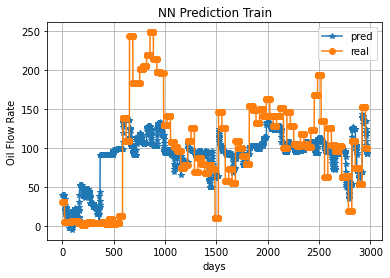

In [40]:
plt.plot(np.arange(0,len(y_predict_train)),y_predict_train,'-*',label='pred')
plt.plot(np.arange(0,len(y_real)),y_real,'-o',label='real')
plt.legend()
plt.grid()
plt.xlabel("days")
plt.ylabel("Oil Flow Rate")
plt.title("NN Prediction Train")

Metric

Root Mean Square Error:
48.51

R2 Value:
0.42


Text(0.5, 1.0, 'R2 Score= 0.42 of Training data')

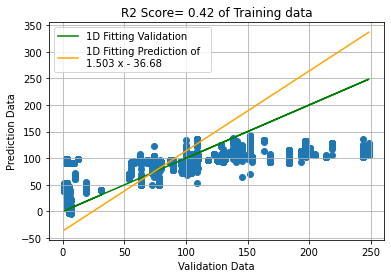

In [41]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real,y_predict_train)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real,y_predict_train)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real,y_predict_train)
plt.plot(y_real,y_real,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_train.flatten(),np.array(y_real).flatten(), 1))
myline = np.linspace(min(np.array(y_real)), max(np.array(y_real)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Training data")

### Validating

In [42]:
y_pred_test = model.predict_generator(test_generator)
rev_trans_test = scaler.inverse_transform(y_pred_test)

y_predict_test = np.resize(rev_trans_test[:,0],(len(rev_trans_test[:,0]),1))
y_real_test = y2[lookback:]

df_final_test = pd.concat([pd.DataFrame(y_predict_test), pd.DataFrame(y_real_test)],axis=1)
df_final_test
print(y_predict_test.shape)
print(y_real_test.shape)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7088/3494749508.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test = model.predict_generator(test_generator)


(1973, 1)
(1973, 1)


Text(0.5, 1.0, 'NN Oil Rate Validation')

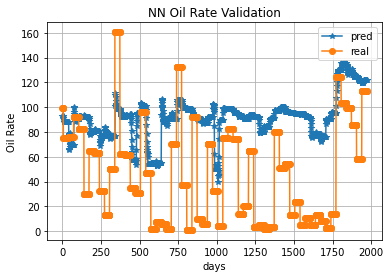

In [43]:
plt.plot(np.arange(0,len(y_predict_test)),y_predict_test,'-*',label='pred')
plt.plot(np.arange(0,len(y_real_test)),y_real_test,'-o',label='real')
plt.grid()
plt.legend()
plt.xlabel("days")
plt.ylabel("Oil Rate")
plt.title(f"NN Oil Rate Validation")

Metric

Root Mean Square Error:
56.2

R2 Value:
-1.02


Text(0.5, 1.0, 'R2 Score= -1.02 of Validation data')

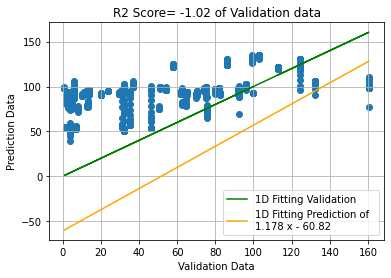

In [44]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real_test,y_predict_test)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real_test,y_predict_test)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real_test,y_predict_test)
plt.plot(y_real_test,y_real_test,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_test.flatten(),np.array(y_real_test).flatten(), 1))
myline = np.linspace(min(np.array(y_real_test)), max(np.array(y_real_test)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Validation data")

In [45]:
a = scaler.inverse_transform(train_generator[0][0])
a

array([[[  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156],
        [  36.62722131,   59.27596992, -104.2148646 ,   58.95509156]]])

## IMPLEMENTATION

In [31]:
type(str(model.summary("")))
str(model.summary(""))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 14, 14)            896       
                                                                 
 lstm_26 (LSTM)              (None, 14, 7)             616       
                                                                 
 lstm_27 (LSTM)              (None, 4)                 192       
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,709
Trainable params: 1,709
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
______________________________

'None'

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_wc1_type4_20+300
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 14, 14)            896       
                                                                 
 lstm_26 (LSTM)              (None, 14, 7)             616       
                                                                 
 lstm_27 (LSTM)              (None, 4)                 192       
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,709
Trainable params: 1,709
Non-trainable params: 0
______________________________________

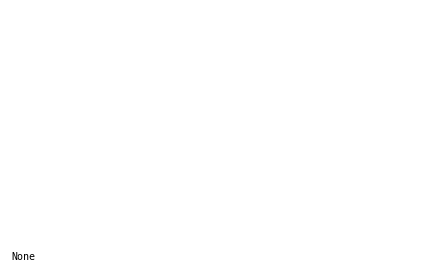

In [1]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

file_pre = 'C:/Users/ASUS/Documents/AllThingsPython/GLO_NN/NNModel_ann/RNN_wc1_type4_20+300'
file_pretrained = file_pre.replace('/','\\')
print(file_pretrained)
model = load_model(f"{file_pretrained}")
print(str(model.summary("")))

#plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model.summary("")), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
#plt.savefig('results.png')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 27ms/step


,pred qo,glir11,wc11,ch11,gor11,pred qt,pred qw
0,89.895134,5742.0,12.0,793.0,20268.0,102.153561,12.258427
1,110.888596,4995.0,21.0,1405.0,79024.0,140.365311,29.476715
2,117.281494,2023.0,36.0,1010.0,8737.0,183.252335,65.970840
3,114.285706,5644.0,25.0,1439.0,339.0,152.380941,38.095235
4,112.678162,1806.0,27.0,778.0,42298.0,154.353646,41.675484
...,...,...,...,...,...,...,...
145,125.903290,4301.0,14.0,427.0,6690.0,146.399174,20.495884
146,107.588867,2344.0,60.0,1386.0,73331.0,268.972168,161.383301
147,117.214081,5979.0,26.0,634.0,60597.0,158.397407,41.183326
148,107.229019,220.0,42.0,682.0,12449.0,184.877619,77.648600


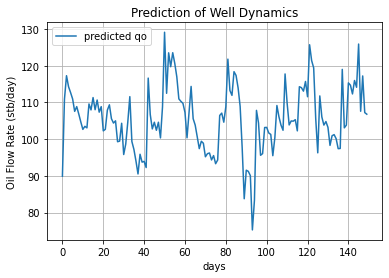

In [47]:
import numpy as np
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import load_model
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_new\RNN_qo_type7_100+14')
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_qo_type2_20+300')
o = list(np.ones(14)*180)
p = list(np.ones(14)*250)
q = list(np.ones(14)*700)
r = list(np.ones(14)*100)

tot = np.stack((o,p,q,r),axis=1).reshape(1,-1,4)
#scale = StandardScaler(tot[0][:][:])
#tot = scale.fit_transform(tot)
#print(tot)
scaler = StandardScaler()
scale = StandardScaler().fit(y)
SS = scale.fit_transform(y)
tot.shape
otemp = o
ptemp = p
qtemp = q
rtemp = r
#x = 'glir11','wc11','ch11','gor11']]
t=0
value_features = []
value_pred = []
qt_tot = []
qw_tot = []
while t<150:
    #otemp.append(random.randint(54,300))
    #ptemp.append(random.randint(4,63))
    #qtemp.append(random.randint(465,1767))
    #rtemp.append(random.randint(7615,21955))
    
    otemp.append(random.randint(20,6220))
    ptemp.append(random.randint(5,60))
    qtemp.append(random.randint(392,1737))
    rtemp.append(random.randint(10,107361))
    #otemp.append(5.4*t+100)
    #ptemp.append(3.2*t+20)
    #qtemp.append(2*t)
    #rtemp.append(10*t+10)
    o = otemp[-14:]
    p = ptemp[-14:]
    q = qtemp[-14:]
    r = rtemp[-14:]

    tot = np.stack((o,p,q,r),axis=1).reshape(1,-1,4)
    current = tot[0][-1][:]
    wc = tot[0][-1][1]
    #print(tot)
    Tot = scaler.fit_transform(tot[0])
    Tot = Tot.reshape(1,14,4)
    s = model.predict(Tot)
    S = scale.inverse_transform(s)

    qt = S[0][0]/((100-wc)/100)
    qw = qt-S[0][0]

    value_pred.append(abs(S[0][0]))
    value_features.append(current)
    qt_tot.append(qt)
    qw_tot.append(qw)
    t+=1

header = ['glir11','wc11','ch11','gor11']
dff = pd.concat([pd.DataFrame(value_pred,columns=['pred qo']), pd.DataFrame(value_features,columns=header),
    pd.DataFrame(qt_tot,columns=['pred qt']), pd.DataFrame(qw_tot,columns=['pred qw'])],axis=1)

import matplotlib.pyplot as plt

#plt.plot(dff[['glir11']],label='predicted glir')
plt.plot(value_pred,label='predicted qo')
#plt.plot(qt_tot,label='predicted qt')
#plt.plot(qw_tot,label='predicted qw')
plt.legend()
plt.grid()
plt.xlabel('days')
plt.ylabel('Oil Flow Rate (stb/day)')
plt.title("Prediction of Well Dynamics")

dff


In [1]:
def normalize_rmse_values(rmse_values, new_min, new_max):
    min_value = min(rmse_values)
    max_value = max(rmse_values)
    
    normalized_values = []
    for value in rmse_values:
        normalized_value = (value - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
        normalized_values.append(normalized_value)
    
    return normalized_values

rmse_values = [27, 40, 50, 60, 80]
new_min = 0
new_max = 1

normalized_values = normalize_rmse_values(rmse_values, new_min, new_max)
print(normalized_values)

[0.0, 0.24528301886792453, 0.4339622641509434, 0.6226415094339622, 1.0]
